# Assignment 02

In [11]:
Name = 'Pradyot Jain'
Student_ID = '48479985'

### Acknowledgement Statement by students:
**I acknowledge that I have only used GAITs (e.g., ChatGPT) in drafting and proofreading this assignment, which is permitted in the assignment instructions.** 

In [13]:
import pandas as pd #importing pandas for the assignment

In [14]:
# Loading the xlsx file and checking the first 5 rows
koalas = pd.read_excel('koalas_dataset.xlsx')
koalas.head()

,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
0,1,1,VIC,m,8.0,16.0,77.0,19.1,19.5,24.5,15.4,2.2,63.0,61.0
1,2,1,VIC,f,6.0,16.5,79.5,17.5,16.2,22.5,12.6,3.0,63.5,58.0
2,3,1,VIC,f,6.0,19.0,83.5,19.0,16.9,25.4,15.0,2.5,65.0,59.0
3,4,1,VIC,f,6.0,18.0,80.0,18.2,17.2,26.1,12.1,2.2,63.0,59.0
4,5,1,VIC,f,2.0,16.0,73.5,16.5,18.2,21.0,11.3,2.1,63.5,58.0


In [15]:
koalas.describe() # general statistics for the data set

,koala_id,region,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,102.000000,103.000000,104.000000,104.000000,103.000000
mean,52.500000,3.625000,3.833333,17.009615,75.088462,18.554808,22.650000,18.461765,12.917476,5.886538,62.000000,57.582524
std,30.166206,2.349086,1.909244,1.959518,4.310549,9.761017,87.562416,4.416935,11.160491,39.082636,2.045597,2.775150
min,1.000000,1.000000,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,26.750000,1.000000,2.250000,15.875000,72.000000,15.700000,9.875000,14.550000,9.950000,1.400000,60.500000,56.000000
50%,52.500000,3.000000,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,78.250000,6.000000,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.250000
max,104.000000,7.000000,9.000000,23.000000,84.500000,110.500000,900.800000,27.900000,120.600000,400.500000,67.000000,65.000000


In [16]:
koalas.shape # number of rows and columns 

(104, 14)

# Section 1: Exploratory Data Analysis

### Step 1: Check for Missing Values

In [19]:
koalas.info() # general info regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   koala_id             104 non-null    int64  
 1   region               104 non-null    int64  
 2   habitat              104 non-null    object 
 3   gender               104 non-null    object 
 4   age_in_years         102 non-null    float64
 5   Paw Size             104 non-null    float64
 6   total_length         104 non-null    float64
 7   head_length          104 non-null    float64
 8   ear_size             104 non-null    float64
 9   foot_length          102 non-null    float64
 10  skull_width          103 non-null    float64
 11  eye_diameter         104 non-null    float64
 12  chest_circumference  104 non-null    float64
 13  belly_circumference  103 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


**We can see there missing values in 4 columns.**

In [21]:
# Checking for missing values
missing_values = koalas.isnull().sum()

# Displaying columns with missing values and their counts
missing_values[missing_values > 0]

age_in_years           2
foot_length            2
skull_width            1
belly_circumference    1
dtype: int64

### Step 2: Handle Missing Values

In [23]:
# Filling missing values based on habitat, gender and region with median.
koalas['age_in_years'] = koalas['age_in_years'].fillna(koalas.groupby(['habitat', 'gender','region'])['age_in_years'].transform('median'))
koalas['foot_length'] = koalas['foot_length'].fillna(koalas.groupby(['habitat', 'gender','region'])['foot_length'].transform('median'))
koalas['skull_width'] = koalas['skull_width'].fillna(koalas.groupby(['habitat', 'gender','region'])['skull_width'].transform('median'))
koalas['belly_circumference'] = koalas['belly_circumference'].fillna(koalas.groupby(['habitat', 'gender','region'])['belly_circumference'].transform('median'))


**By replacing missing values with the median depending on gender, habitat, and region, we keep all data while properly portraying each variable's central tendency. Dropping columns would lower the dataset's size, which is especially significant considering its modest size.**

In [25]:
# Verifying if there are any remaining missing values
missing_values_cleaned = koalas.isnull().sum()
missing_values_cleaned

koala_id               0
region                 0
habitat                0
gender                 0
age_in_years           0
Paw Size               0
total_length           0
head_length            0
ear_size               0
foot_length            0
skull_width            0
eye_diameter           0
chest_circumference    0
belly_circumference    0
dtype: int64

### Step 3: Check for Duplicate Rows

In [27]:
# Checking the number of unique values in each column.
unique_values = koalas.nunique()

# Displaying the number of unique values
unique_values

koala_id               104
region                   7
habitat                  8
gender                   4
age_in_years            10
Paw Size                19
total_length            34
head_length             71
ear_size                71
foot_length             74
skull_width             64
eye_diameter            33
chest_circumference     19
belly_circumference     24
dtype: int64

In [28]:
# Checking for duplicates on the basis of Koala_id
duplicates_koalas_id = koalas.duplicated(subset=['koala_id']).sum()
duplicates_koalas_id

0

**There are no duplicates as the koala_id is unique for every row.**

### Step 4: Similar Records 

In [31]:
# Checking data type for the coloumns
koalas.dtypes # checking for non numerical columns

koala_id                 int64
region                   int64
habitat                 object
gender                  object
age_in_years           float64
Paw Size               float64
total_length           float64
head_length            float64
ear_size               float64
foot_length            float64
skull_width            float64
eye_diameter           float64
chest_circumference    float64
belly_circumference    float64
dtype: object

In [32]:
# Checking unique values in habitat
koalas['habitat'].unique()

array(['VIC', 'VICtoria', 'Vic', 'QLD', 'Queensland', 'Queenstown', 'qld',
       'q'], dtype=object)

In [33]:
# Checking unique values in gender
koalas['gender'].unique()

array(['m', 'f', 'female', 'male'], dtype=object)

**We will only check for non numerical columns.**

In [35]:
# Defining a dictionary with the replacements
replacements = {'Queensland': 'QLD', 'VICtoria': 'VIC','Queenstown': 'QLD','q': 'QLD','qld': 'QLD','Vic': 'VIC'} 

# Replacing the values in the 'categories' column
koalas['habitat'] = koalas['habitat'].replace(replacements)

In [36]:
# Replacing similar names with common names
koalas['gender'] =koalas['gender'].replace('m', 'male')
koalas['gender'] =koalas['gender'].replace('f', 'female')

In [37]:
# Checking after replacing
koalas['habitat'].unique()

array(['VIC', 'QLD'], dtype=object)

In [38]:
koalas['gender'].unique()

array(['male', 'female'], dtype=object)

**Variations in the habitat and gender columns were standardized as part of the data-cleaning procedure to maintain uniformity. Multiple state names were condensed into QLD and VIC, while gender data were standardized to male and female. This guarantees a consistent dataset, improving the analysis's accuracy and reliability.**

### Step 5: Checking Data type

In [41]:
print(koalas.columns)

Index(['koala_id', 'region', 'habitat', 'gender', 'age_in_years', 'Paw Size',
       'total_length', 'head_length', 'ear_size', 'foot_length', 'skull_width',
       'eye_diameter', 'chest_circumference', 'belly_circumference'],
      dtype='object')


In [42]:
# Checking for data types
print("Datatype of habitats:",koalas['habitat'].dtypes)
print("Datatype of gender:",koalas['gender'].dtypes)


Datatype of habitats: object
Datatype of gender: object


**We checked the data type of the non numerical columns.**

### Step 6: Converting the data types

In [45]:
# Converting categorical columns to 'category' type
koalas['gender'] = koalas['gender'].astype('category')
koalas['habitat'] = koalas['habitat'].astype('category')

# Verifying the changes
koalas.dtypes

koala_id                  int64
region                    int64
habitat                category
gender                 category
age_in_years            float64
Paw Size                float64
total_length            float64
head_length             float64
ear_size                float64
foot_length             float64
skull_width             float64
eye_diameter            float64
chest_circumference     float64
belly_circumference     float64
dtype: object

**We are converting the objects into category because it will improve the analysis**

### Step 7: Outliers

In [48]:
import numpy as np

# List of relevant columns
columns = ['koala_id', 'region', 'age_in_years', 'Paw Size', 'total_length', 'head_length', 
           'ear_size', 'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']

# Calculating Q1, Q3, and IQR for relevant columns
Q1 = koalas[columns].quantile(0.25)
Q3 = koalas[columns].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
outliers = (koalas[columns] < (Q1 - 1.5 * IQR)) | (koalas[columns] > (Q3 + 1.5 * IQR))

# Summarizing the number of outliers per column
outliers_summary = outliers.sum()
outliers_summary[outliers_summary >0 ]


age_in_years           2
Paw Size               4
head_length            4
ear_size               2
skull_width            9
eye_diameter           2
chest_circumference    1
belly_circumference    3
dtype: int64

**Ploting the variable distributions with outliers using a boxplot or histogram. This enables us to determine whether the outliers deviate significantly from the main distribution yet remain within a reasonable range.**

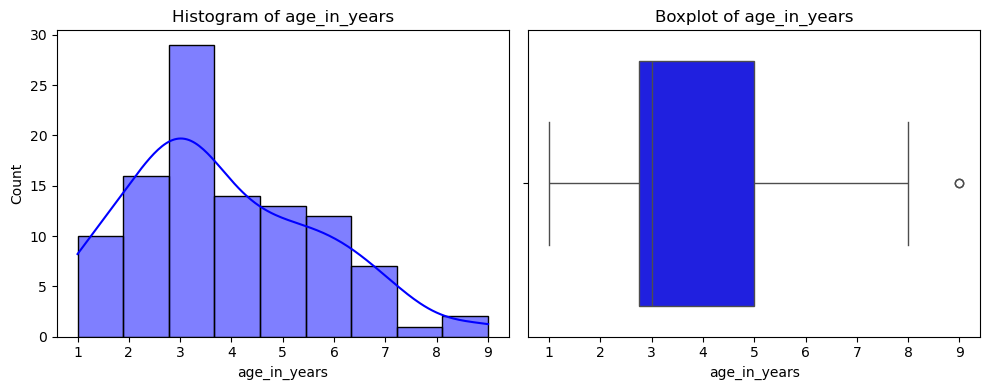

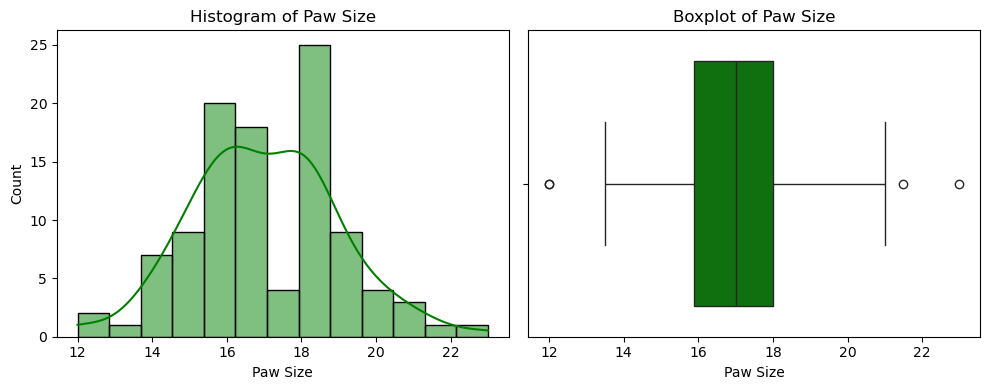

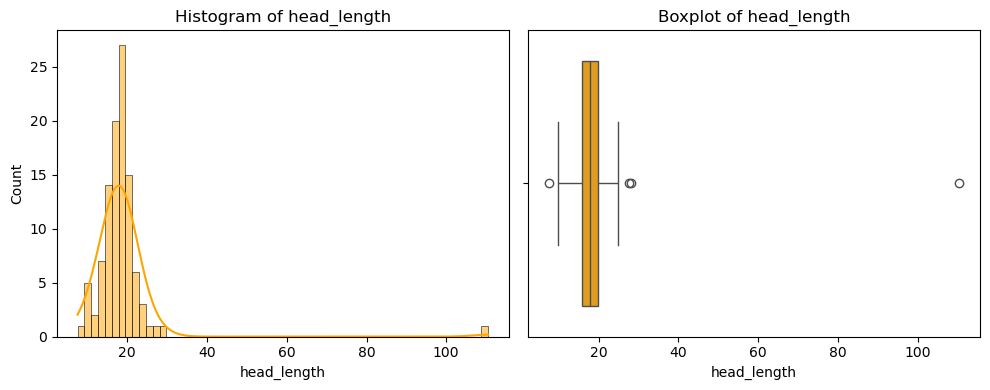

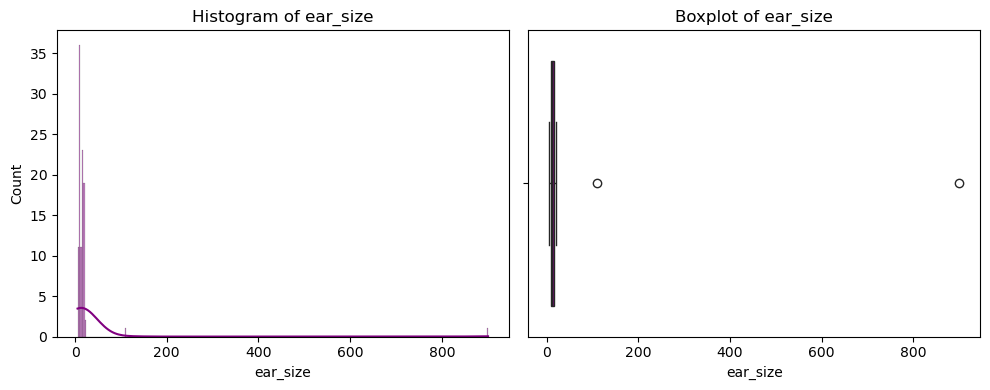

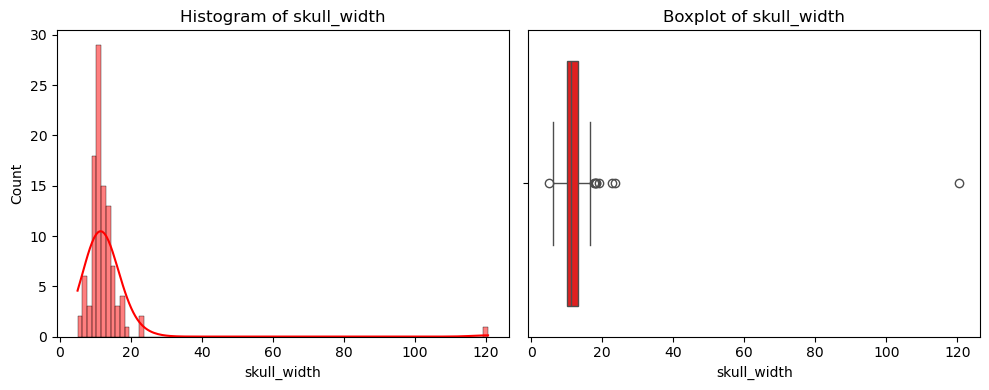

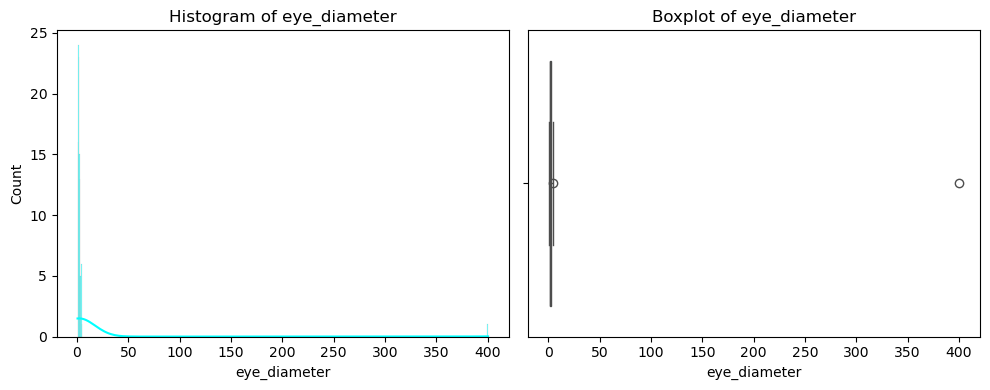

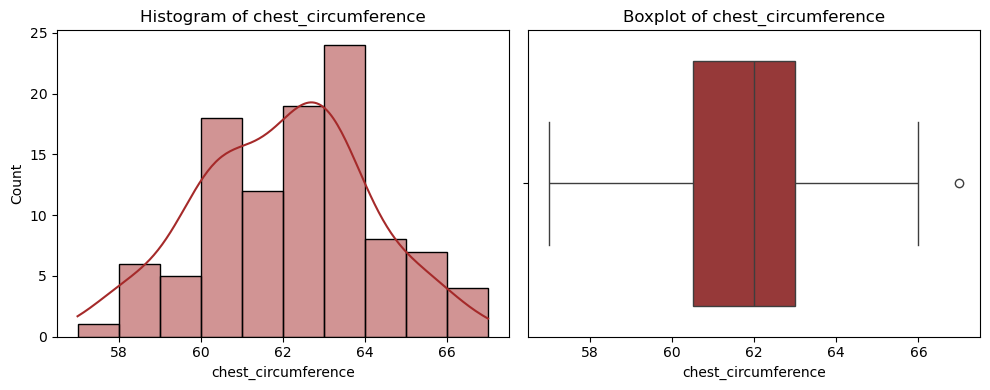

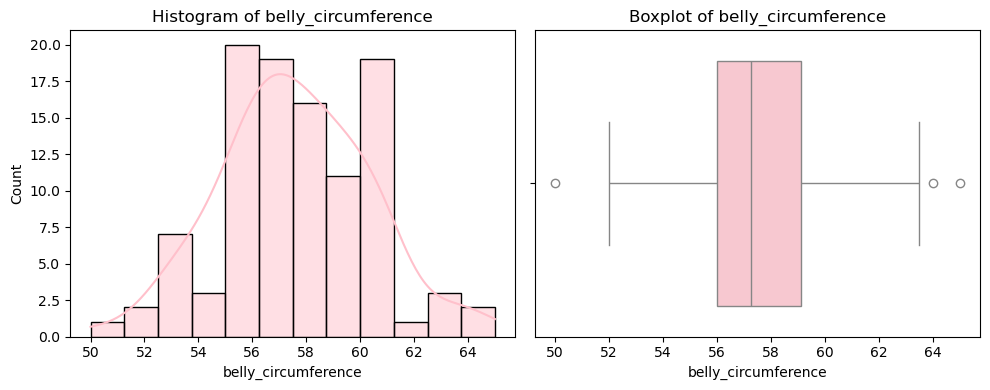

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Defining colors for each column
colors = ['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'brown', 'pink']

# Ploting histograms and boxplots with different colors
columns_with_outliers = ['age_in_years', 'Paw Size', 'head_length', 'ear_size', 
                         'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']

for col, color in zip(columns_with_outliers, colors):
    plt.figure(figsize=(10, 4))
    
    # Histogram with custom color
    plt.subplot(1, 2, 1)
    sns.histplot(koalas[col], kde=True, color=color)
    plt.title(f'Histogram of {col}')
    
    # Boxplot with custom color
    plt.subplot(1, 2, 2)
    sns.boxplot(x=koalas[col], color=color)
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

**Reason for doing this:** Even if the outliers are far from the main data cluster, they may still be legitimate if they match the distribution structure. They could require more research if they significantly depart from the overall pattern. 

In [52]:
koalas.describe()

,koala_id,region,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.826923,17.009615,75.088462,18.554808,22.650000,18.446154,12.899038,5.886538,62.000000,57.567308
std,30.166206,2.349086,1.891177,1.959518,4.310549,9.761017,87.562416,4.403153,11.107773,39.082636,2.045597,2.766002
min,1.000000,1.000000,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,26.750000,1.000000,2.750000,15.875000,72.000000,15.700000,9.875000,14.500000,9.975000,1.400000,60.500000,56.000000
50%,52.500000,3.000000,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.250000
75%,78.250000,6.000000,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.125000
max,104.000000,7.000000,9.000000,23.000000,84.500000,110.500000,900.800000,27.900000,120.600000,400.500000,67.000000,65.000000


In [53]:
# Done this to widen display
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [54]:
# Grouped summary statistics
summary_stats = koalas.groupby(['habitat', 'gender'], observed=False)[columns_with_outliers].describe()
summary_stats

age_in_years                                                Paw Size                                                         head_length                                                           ear_size                                                           skull_width                                                      eye_diameter                                                       chest_circumference                                                      belly_circumference                                                     
                      count      mean       std  min  25%   50%   75%  max    count       mean       std   min     25%    50%     75%   max       count       mean        std   min     25%    50%     75%    max    count       mean         std   min     25%   50%     75%    max       count       mean        std  min    25%   50%   75%    max        count       mean        std  min    25%   50%    75%    max               count       mean       std   min    25%   50%    75%   max               count       mean       std   min     25%   50%   75%   max
habitat gender                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
QLD     female         19.0  3.894737  1.410072  2.0  3.0  3.00  5.00  7.0     19.0  18.078947  1.250146  16.0  18.000  18.00  18.500  21.0        19.0  16.815789   2.672964  11.0  15.200  16.90  18.400   21.9     19.0   9.557895    1.663435   6.3   8.600   9.2  10.950   12.2        19.0  11.515789   2.191211  7.0  10.40  11.4  13.0   14.9         19.0   2.015789   1.179107  0.5  1.000  1.80  2.850    4.4                19.0  61.815789  1.574189  60.0  60.75  61.0  63.00  66.0                19.0  58.315789  3.105598  53.5  56.250  58.5  59.5  64.0
        male           39.0  3.589744  1.901771  1.0  2.0  3.00  5.00  7.0     39.0  17.756410  1.905228  14.0  16.500  18.00  18.250  23.0        39.0  20.530769  15.472083   7.5  15.350  18.20  22.250  110.5     39.0  35.471795  143.121970   6.7   9.300  10.0  11.300  900.8        39.0  12.271795   3.987477  5.0   9.75  11.2  14.4   23.6         39.0  12.479487  63.777092  0.5  1.500  2.00  3.250  400.5                39.0  61.564103  2.314654  57.0  60.00  61.0  63.25  67.0                39.0  57.089744  2.544012  52.0  55.500  57.0  59.0  61.5
VIC     female         24.0  4.041667  2.312145  1.0  2.0  4.00  6.00  9.0     24.0  16.333333  1.868891  12.0  15.000  16.25  17.625  19.5        24.0  17.412500   2.520233   9.7  16.375  17.95  19.325   20.9     24.0  16.758333    2.700711   5.3  16.275  17.1  18.225   18.9        24.0  11.645833   2.878251  6.5  10.30  11.3  12.3   22.7         24.0   1.741667   0.730644  0.5  1.200  1.80  2.325    3.0                24.0  62.750000  1.961588  58.0  62.00  63.0  64.00  66.0                24.0  57.541667  2.801074  50.0  56.375  58.0  59.0  65.0
        male           22.0  3.954545  1.805475  2.0  3.0  3.25  4.75  8.0     22.0  15.500000  1.455695  12.0  14.625  15.50  16.000  19.5        22.0  17.800000   2.997300  10.1  16.450  18.40  19.925   21.3     22.0  17.654545    1.734998  14.5  16.650  17.3  18.650   21.2        22.0  16.572727  23.341098  6.5  10.10  11.4  13.5  120.6         22.0   2.063636   0.720810  0.8  1.425  1.95  2.600    3.4                22.0  62.113636  1.857621  58.0  61.25  62.0  63.00  66.0                22.0  57.795455  2.822778  52.0  56.125  57.0  60.0  63.0

### Step 8: Transformation of Outliers 

In [56]:
# Transformation for outliers in head_length.
# Calculate Q1, Q3, and IQR for head_length
Q1 = koalas['head_length'].quantile(0.25)
Q3 = koalas['head_length'].quantile(0.75)
IQR = Q3 - Q1

# Calculating the thresholds based on IQR
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Checking the maximum and minimum ear size before filtering
print(f"Lower threshold: {lower_threshold:.4f}")
print(f"Upper threshold: {upper_threshold:.4f}")
print("Head Length range before filtering:", koalas['head_length'].min(), "to", koalas['head_length'].max())

# Removeing outliers based on these thresholds
koalas_cleaned = koalas[(koalas['head_length'] < lower_threshold) | (koalas['head_length'] <= upper_threshold)]

# Checking the maximum and minimum ear size after filtering
print("Head Length range after filtering:", koalas_cleaned['head_length'].min(), "to", koalas_cleaned['head_length'].max())
print("Number of rows after removal:", len(koalas_cleaned))

Lower threshold: 9.5500
Upper threshold: 25.9500
Head Length range before filtering: 7.5 to 110.5
Head Length range after filtering: 7.5 to 24.9
Number of rows after removal: 101


In [57]:
# Transformation for outliers in ear_size.
# Calculating Q1, Q3, and IQR for ear_size
Q1 = koalas_cleaned['ear_size'].quantile(0.25)
Q3 = koalas_cleaned['ear_size'].quantile(0.75)
IQR = Q3 - Q1

# Calculating the thresholds based on IQR
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Checking the maximum and minimum ear size before filtering
print(f"Lower threshold: {lower_threshold:.4f}")
print(f"Upper threshold: {upper_threshold:.4f}")
print("Ear size range before filtering:", koalas_cleaned['ear_size'].min(), "to", koalas_cleaned['ear_size'].max())

# Removeing outliers based on these thresholds
koalas_cleaned = koalas_cleaned[(koalas_cleaned['ear_size'] < lower_threshold) | (koalas_cleaned['ear_size'] <= upper_threshold)]

# Checking the maximum and minimum ear size after filtering
print("Ear size range after filtering:", koalas_cleaned['ear_size'].min(), "to", koalas_cleaned['ear_size'].max())
print("Number of rows after removal:", len(koalas_cleaned))

Lower threshold: -0.9000
Upper threshold: 27.9000
Ear size range before filtering: 5.3 to 900.8
Ear size range after filtering: 5.3 to 21.2
Number of rows after removal: 99


In [58]:
# Transformation for outliers in skull_width
# Calculate Q1, Q3, and IQR for skull_width
Q1 = koalas_cleaned['skull_width'].quantile(0.25)
Q3 = koalas_cleaned['skull_width'].quantile(0.75)
IQR = Q3 - Q1

# Calculating the thresholds based on IQR
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Checking the maximum and minimum skull width before filtering
print(f"Lower threshold: {lower_threshold:.4f}")
print(f"Upper threshold: {upper_threshold:.4f}")
print("Skull width range before filtering:", koalas_cleaned['skull_width'].min(), "to", koalas_cleaned['skull_width'].max())

# Removing outliers based on these thresholds
koalas_cleaned = koalas_cleaned[(koalas_cleaned['skull_width'] < lower_threshold) |(koalas_cleaned['skull_width'] <= upper_threshold)]

# Checking the maximum and minimum skull width after filtering
print("Skull width range after filtering:", koalas_cleaned['skull_width'].min(), "to", koalas_cleaned['skull_width'].max())
print("Number of rows after removal:", len(koalas_cleaned))


Lower threshold: 5.4250
Upper threshold: 17.6250
Skull width range before filtering: 5.0 to 120.6
Skull width range after filtering: 5.0 to 16.5
Number of rows after removal: 94


In [59]:
# Transformation for outliers in eye_diameter
# Calculating Q1, Q3, and IQR for eye_diameter
Q1 = koalas_cleaned['eye_diameter'].quantile(0.25)
Q3 = koalas_cleaned['eye_diameter'].quantile(0.75)
IQR = Q3 - Q1

# Calculating the thresholds based on IQR
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Checking the maximum and minimum eye diameter after filtering
print(f"Lower threshold: {lower_threshold:.4f}")
print(f"Upper threshold: {upper_threshold:.4f}")
print("Eye diameter range before filtering:", koalas_cleaned['eye_diameter'].min(), "to", koalas_cleaned['eye_diameter'].max())

# Removing outliers based on these thresholds
koalas_cleaned = koalas_cleaned[(koalas_cleaned['eye_diameter'] < lower_threshold) |(koalas_cleaned['eye_diameter'] <= upper_threshold)]

# Checking the maximum and minimum eye diameter after filtering
print("Eye diameter range after filtering:", koalas_cleaned['eye_diameter'].min(), "to", koalas_cleaned['eye_diameter'].max())
print("Number of rows after removal:", len(koalas_cleaned))


Lower threshold: -0.4750
Upper threshold: 4.5250
Eye diameter range before filtering: 0.5 to 4.8
Eye diameter range after filtering: 0.5 to 4.4
Number of rows after removal: 93


In [60]:
# Calculating Q1, Q3, and IQR for belly_circumference
Q1 = koalas_cleaned['belly_circumference'].quantile(0.25)
Q3 = koalas_cleaned['belly_circumference'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper thresholds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print(f"Lower threshold: {lower_threshold}")
print(f"Upper threshold: {upper_threshold}")

# Filtering rows where belly_circumference is outside the thresholds
outliers = koalas_cleaned[(koalas_cleaned['belly_circumference'] < lower_threshold) | 
                          (koalas_cleaned['belly_circumference'] > upper_threshold)]

# Printing the rows with outliers in belly_circumference
print("Rows with outliers in belly circumference:")
outliers

Lower threshold: 51.5
Upper threshold: 63.5
Rows with outliers in belly circumference:


,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
20,21,1,VIC,female,3.0,19.5,84.5,20.9,17.9,27.9,13.1,1.2,65.0,65.0
38,39,2,VIC,female,1.0,14.0,63.0,9.7,18.4,18.7,6.5,0.5,60.0,50.0
56,57,4,QLD,female,4.0,21.0,81.0,20.1,10.3,17.2,14.4,1.5,66.0,64.0


In [61]:
from scipy.stats import mstats
# Checking the new range before Winsorization
print("Chest circumference range before Winsorization:", koalas_cleaned['chest_circumference'].min(), "to", koalas_cleaned['chest_circumference'].max())
print("Belly circumference range before Winsorization:", koalas_cleaned['belly_circumference'].min(), "to", koalas_cleaned['belly_circumference'].max())

# Applying Winsorization to cap extreme values at the 95th percentile for both chest_circumference and belly_circumference
koalas_cleaned['chest_circumference'] = mstats.winsorize(koalas_cleaned['chest_circumference'], limits=[0, 0.05])
koalas_cleaned['belly_circumference'] = mstats.winsorize(koalas_cleaned['belly_circumference'], limits=[0, 0.05])

# Checking the new range after Winsorization
print("Chest circumference range after Winsorization:", koalas_cleaned['chest_circumference'].min(), "to", koalas_cleaned['chest_circumference'].max())
print("Belly circumference range after Winsorization:", koalas_cleaned['belly_circumference'].min(), "to", koalas_cleaned['belly_circumference'].max())

Chest circumference range before Winsorization: 57.0 to 66.0
Belly circumference range before Winsorization: 50.0 to 65.0
Chest circumference range after Winsorization: 57.0 to 65.0
Belly circumference range after Winsorization: 50.0 to 63.0


In [62]:
# Defining all the columns which has outliers with one single variable
columns_with_outliers = ['age_in_years', 'Paw Size', 'ear_size', 'head_length', 
                         'foot_length', 'skull_width', 'eye_diameter', 
                         'chest_circumference', 'belly_circumference']

In [63]:
# Since I was getting a masked array warning I have done this.
# I got this code from ChatGPT 
# Converting MaskedArrays in the DataFrame to regular arrays, ensuring no masked elements remain
koalas_cleaned = koalas_cleaned.apply(lambda x: pd.Series(np.asarray(x)) if hasattr(x, 'mask') else x)

In [64]:
# Loop through each column and calculate thresholds, then check for outliers
for col in columns_with_outliers:
    Q1 = koalas_cleaned[col].quantile(0.25)
    Q3 = koalas_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5 * IQR
    lower_threshold = Q1 - 1.5 * IQR

    # Filtering rows that exceed the upper threshold
    outliers = koalas_cleaned[(koalas_cleaned[col] < (Q1 - 1.5 * IQR)) |(koalas_cleaned[col] > upper_threshold)]

    # Displaying results for each column
    print(f"\n{col} - Lower Threshold: {lower_threshold}")
    print(f"{col} - Upper Threshold: {upper_threshold}")
    print(f"Remaining outliers in {col}: {len(outliers)}")


age_in_years - Lower Threshold: 0.0
age_in_years - Upper Threshold: 8.0
Remaining outliers in age_in_years: 2

Paw Size - Lower Threshold: 13.0
Paw Size - Upper Threshold: 21.0
Remaining outliers in Paw Size: 3

ear_size - Lower Threshold: -0.7499999999999982
ear_size - Upper Threshold: 27.65
Remaining outliers in ear_size: 0

head_length - Lower Threshold: 9.900000000000002
head_length - Upper Threshold: 25.099999999999998
Remaining outliers in head_length: 2

foot_length - Lower Threshold: 2.2500000000000018
foot_length - Upper Threshold: 34.65
Remaining outliers in foot_length: 0

skull_width - Lower Threshold: 5.4
skull_width - Upper Threshold: 17.4
Remaining outliers in skull_width: 1

eye_diameter - Lower Threshold: -0.2500000000000002
eye_diameter - Upper Threshold: 4.15
Remaining outliers in eye_diameter: 2

chest_circumference - Lower Threshold: 56.75
chest_circumference - Upper Threshold: 66.75
Remaining outliers in chest_circumference: 0

belly_circumference - Lower Thresho

In [65]:
# Calculating Q1, Q3, and IQR for relevant columns
Q1 = koalas_cleaned[columns].quantile(0.25)
Q3 = koalas_cleaned[columns].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers
outliers = (koalas_cleaned[columns] < (Q1 - 1.5 * IQR)) |(koalas_cleaned[columns] > (Q3 + 1.5 * IQR))

# Summarizing the number of outliers per column
outliers_summary_after = outliers.sum()
outliers_summary_after[outliers_summary_after >0 ]

age_in_years           2
Paw Size               3
head_length            2
skull_width            1
eye_diameter           2
belly_circumference    1
dtype: int64

# Section 2: Data visualisation

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

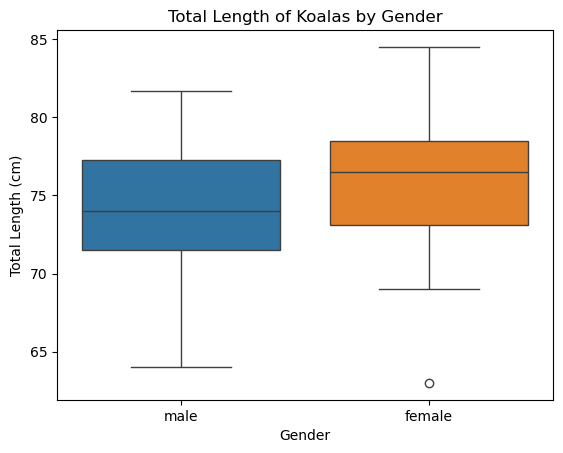

In [69]:
# Boxplot: Total Length of Koalas by Gender
sns.boxplot(x='gender', y='total_length', data=koalas_cleaned, hue='gender')
plt.title('Total Length of Koalas by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Length (cm)')
plt.show()

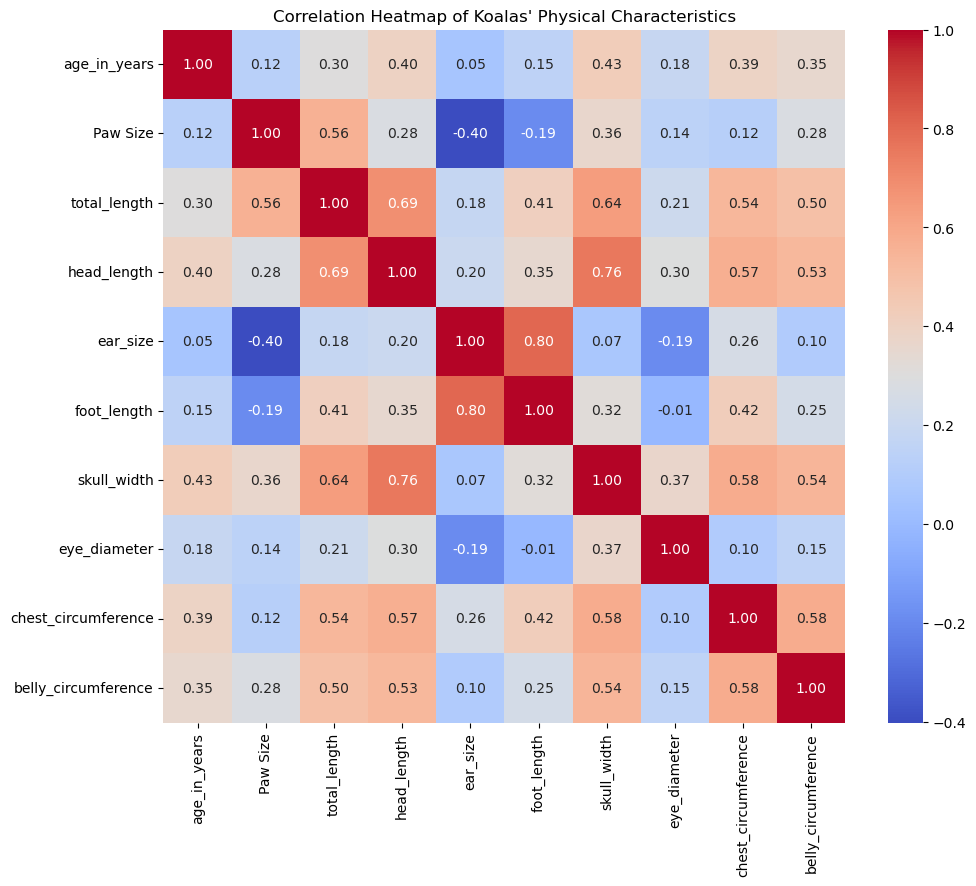

In [70]:
# Correlation Heatmap of Physical Characteristics
physical_features = ['age_in_years', 'Paw Size', 'total_length', 'head_length', 'ear_size', 
                     'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']
correlation_matrix = koalas_cleaned[physical_features].corr()

plt.figure(figsize=[11,9])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Koalas\' Physical Characteristics')
plt.show()

# Section 3: Analysis

#### 1. Is the mean head length of the Koalas significantly different from 92.0 mm?

**For this we will use one sample t-test**

In [76]:
from scipy import stats

In [77]:
# Converting 92.0 mm to cm (9.2 cm)
test_value_cm = 9.2

# Extracting head length column
head_length = koalas_cleaned['head_length']

# Performing one-sample t-test against 9.2 cm
t_stat, p_value = stats.ttest_1samp(head_length, test_value_cm)

In [78]:
# Displaying the t-statistic and p-value
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

T-statistic: 23.6859
P-value: 0.0000


In [79]:
# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("The mean head length is significantly different from 92.0 mm.")
else:
    print("The mean head length is not significantly different from 92.0 mm.")

The mean head length is significantly different from 92.0 mm.


**The one-sample t-test shows that the mean head length of the koalas is significantly different from 92.0 mm (p-value < 0.05).**

### 2. Do male and female Koalas have significantly different mean head lengths?

**For this we will use two sample t-test.**

In [83]:
# Calculating the head length for male and female koalas
male_head_length = koalas_cleaned[koalas_cleaned['gender'] == 'male']['head_length']
female_head_length = koalas_cleaned[koalas_cleaned['gender'] == 'female']['head_length']

# Calculating and display the mean head lengths
mean_male_head_length = male_head_length.mean()
mean_female_head_length = female_head_length.mean()

print(f"Mean Head Length for Male Koalas: {mean_male_head_length:.2f} cm")
print(f"Mean Head Length for Female Koalas: {mean_female_head_length:.2f} cm")

Mean Head Length for Male Koalas: 17.45 cm
Mean Head Length for Female Koalas: 17.09 cm


In [84]:
# Performing an independent two-sample t-test
t_stat, p_value = stats.ttest_ind(male_head_length, female_head_length)

# Displaying the t-test results
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

T-statistic: 0.5296
P-value: 0.5977


In [85]:
# Interpretation
alpha = 0.05  # significance level
if p_value < alpha:
    print("The mean head lengths of male and female koalas are significantly different.")
else:
    print("The mean head lengths of male and female koalas are not significantly different.")

The mean head lengths of male and female koalas are not significantly different.


**Since the mean head lengths of male and female koalas are not significantly different (p-value ≥ 0.05), we can conclude that gender does not significantly impact head length in this population.**

### 3. Can we predict the total length of a Koala based on its head length?

**For this we will use Ordinary Least Square(OLS) to find R2 score. R-squared value to see how well head length explains the variability in total length.**

In [89]:
import statsmodels.api as sm

In [90]:
# Prepare the data for OLS regression
X = koalas_cleaned['head_length']  # Predictor variable
y = koalas_cleaned['total_length']  # Response variable

# Adding a constant to the predictor variable for the intercept
X = sm.add_constant(X)

# Fitting the OLS regression model
ols_model = sm.OLS(y, X).fit()

# Displaying the summary of the model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_length   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     81.06
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           3.11e-14
Time:                        13:06:20   Log-Likelihood:                -237.50
No. Observations:                  93   AIC:                             479.0
Df Residuals:                      91   BIC:                             484.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.4628      1.752     33.944      0.000      55.983      62.943
head_length     0.8964      0.100      9.003      0.000       0.699       1.094
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.865   Jarque-Bera (JB):                0.467
Skew:                          -0.048   Prob(JB):                        0.792
Kurtosis:                       2.666   Cond. No.                         94.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

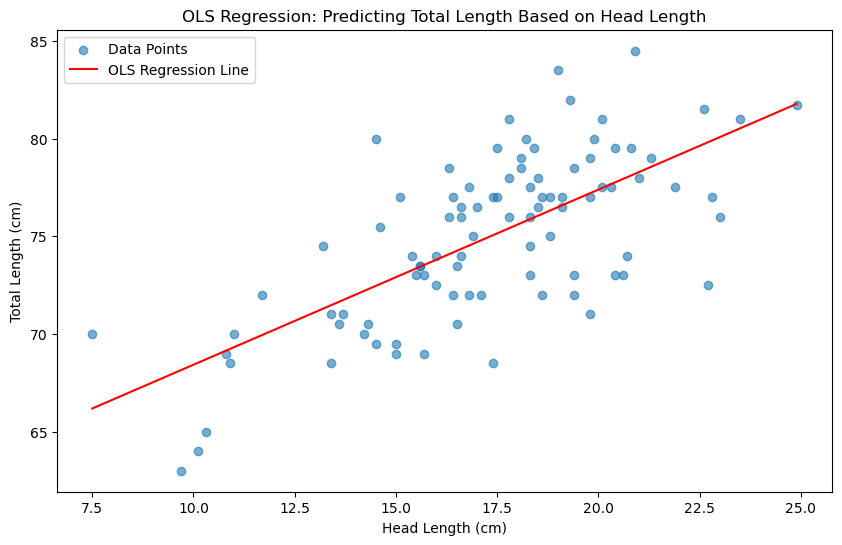

In [91]:
# Generating prediction line for plotting
x_vals = np.linspace(koalas_cleaned['head_length'].min(), koalas_cleaned['head_length'].max(), 100)
X_pred = sm.add_constant(x_vals)
y_vals = ols_model.predict(X_pred)

# Plotting the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(koalas_cleaned['head_length'], koalas_cleaned['total_length'], alpha=0.6, label='Data Points')
plt.plot(x_vals, y_vals, color='red', label='OLS Regression Line')
plt.xlabel('Head Length (cm)')
plt.ylabel('Total Length (cm)')
plt.title('OLS Regression: Predicting Total Length Based on Head Length')
plt.legend()
plt.show()

**Conclusion:** The model suggests that head length can be used to predict the total length of a koala to some extent, as head length is a statistically significant predictor.However, because the R-squared value (0.471) is moderate, head length alone cannot entirely explain overall length, and other physical or biological properties may also be involved. As a result, while head length is useful for predicting total length, adding more predictors could improve the model's accuracy.

### 4. Can we predict the total length of a Koala based on multiple factors such as head length, skull width, and foot length?


**For this we will use Ordinary Least Square(OLS) to find R2 score. R-squared value to see how well head length, skull width and foot length predict the total length of Koalas.**

In [95]:
# Defining the predictor variables and response variable
X = koalas_cleaned[['head_length', 'skull_width', 'foot_length']]  # Multiple predictors
y = koalas_cleaned['total_length']  # Response variable

# Adding a constant to the predictor variables for the intercept term
X = sm.add_constant(X)

# Fitting the OLS regression model
ols_model = sm.OLS(y, X).fit()

# Displaying the summary of the model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_length   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.52
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           1.36e-14
Time:                        13:06:21   Log-Likelihood:                -231.96
No. Observations:                  93   AIC:                             471.9
Df Residuals:                      89   BIC:                             482.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.6080      1.882     30.079      0.000      52.869      60.347
head_length     0.5663      0.147      3.843      0.000       0.273       0.859
skull_width     0.4791      0.212      2.261      0.026       0.058       0.900
foot_length     0.1696      0.074      2.280      0.025       0.022       0.317
==============================================================================
Omnibus:                        1.011   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.603   Jarque-Bera (JB):                0.946
Skew:                          -0.013   Prob(JB):                        0.623
Kurtosis:                       2.506   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**We will check can we predict total length based on all the physical characteristics.**

In [98]:
# Checking for more than all physical characteristics 
# Defining the predictor variables and response variable
X = koalas_cleaned[['Paw Size', 'head_length', 
           'ear_size', 'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']]  # Multiple predictors
y = koalas_cleaned['total_length']  # Response variable

# Adding a constant to the predictor variables for the intercept term
X = sm.add_constant(X)

# Fitting the OLS regression model
ols_model = sm.OLS(y, X).fit()

# Displaying the summary of the model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_length   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     28.71
Date:                Sun, 13 Oct 2024   Prob (F-statistic):           5.28e-21
Time:                        13:06:21   Log-Likelihood:                -205.85
No. Observations:                  93   AIC:                             429.7
Df Residuals:                      84   BIC:                             452.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  19.1331     10.245      1.868      0.065      -1.241      39.507
Paw Size                1.2274      0.167      7.367      0.000       0.896       1.559
head_length             0.4281      0.122      3.519      0.001       0.186       0.670
ear_size                0.0813      0.115      0.704      0.483      -0.148       0.311
foot_length             0.2518      0.104      2.426      0.017       0.045       0.458
skull_width             0.0134      0.189      0.071      0.944      -0.363       0.389
eye_diameter            0.1932      0.297      0.651      0.517      -0.397       0.783
chest_circumference     0.3308      0.186      1.780      0.079      -0.039       0.700
belly_circumference     0.0165      0.120      0.137      0.891      -0.222       0.255
==============================================================================
Omnibus:                        1.877   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.873
Skew:                          -0.329   Prob(JB):                        0.392
Kurtosis:                       2.774   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5. Do environmental factors such as state affect Koala’s physical characteristics?

In [101]:
# Grouped summary statistics for total length, head length, and foot length by region
grouped_stats_habitat = koalas_cleaned.groupby('habitat', observed=True)[physical_features].agg(['mean', 'median'])

# Displaying the grouped statistics
grouped_stats_habitat

age_in_years          Paw Size        total_length        head_length          ear_size        foot_length        skull_width        eye_diameter        chest_circumference        belly_circumference       
                mean median       mean median         mean median        mean median       mean median        mean median        mean median         mean median                mean median                mean median
habitat                                                                                                                                                                                                               
QLD         3.693878    3.0  17.775510   18.0    74.504082   74.5   17.059184  16.80   9.867347  10.00   14.816327  14.70   11.326531   11.2     2.153061    2.0           61.336735   61.0           57.295918   57.0
VIC         4.045455    3.5  15.965909   16.0    75.465909   77.0   17.543182  18.15  17.172727  17.15   22.413636  22.75   11.381818   11.2     1.881818    1.9           62.352273   63.0           57.602273   57.5

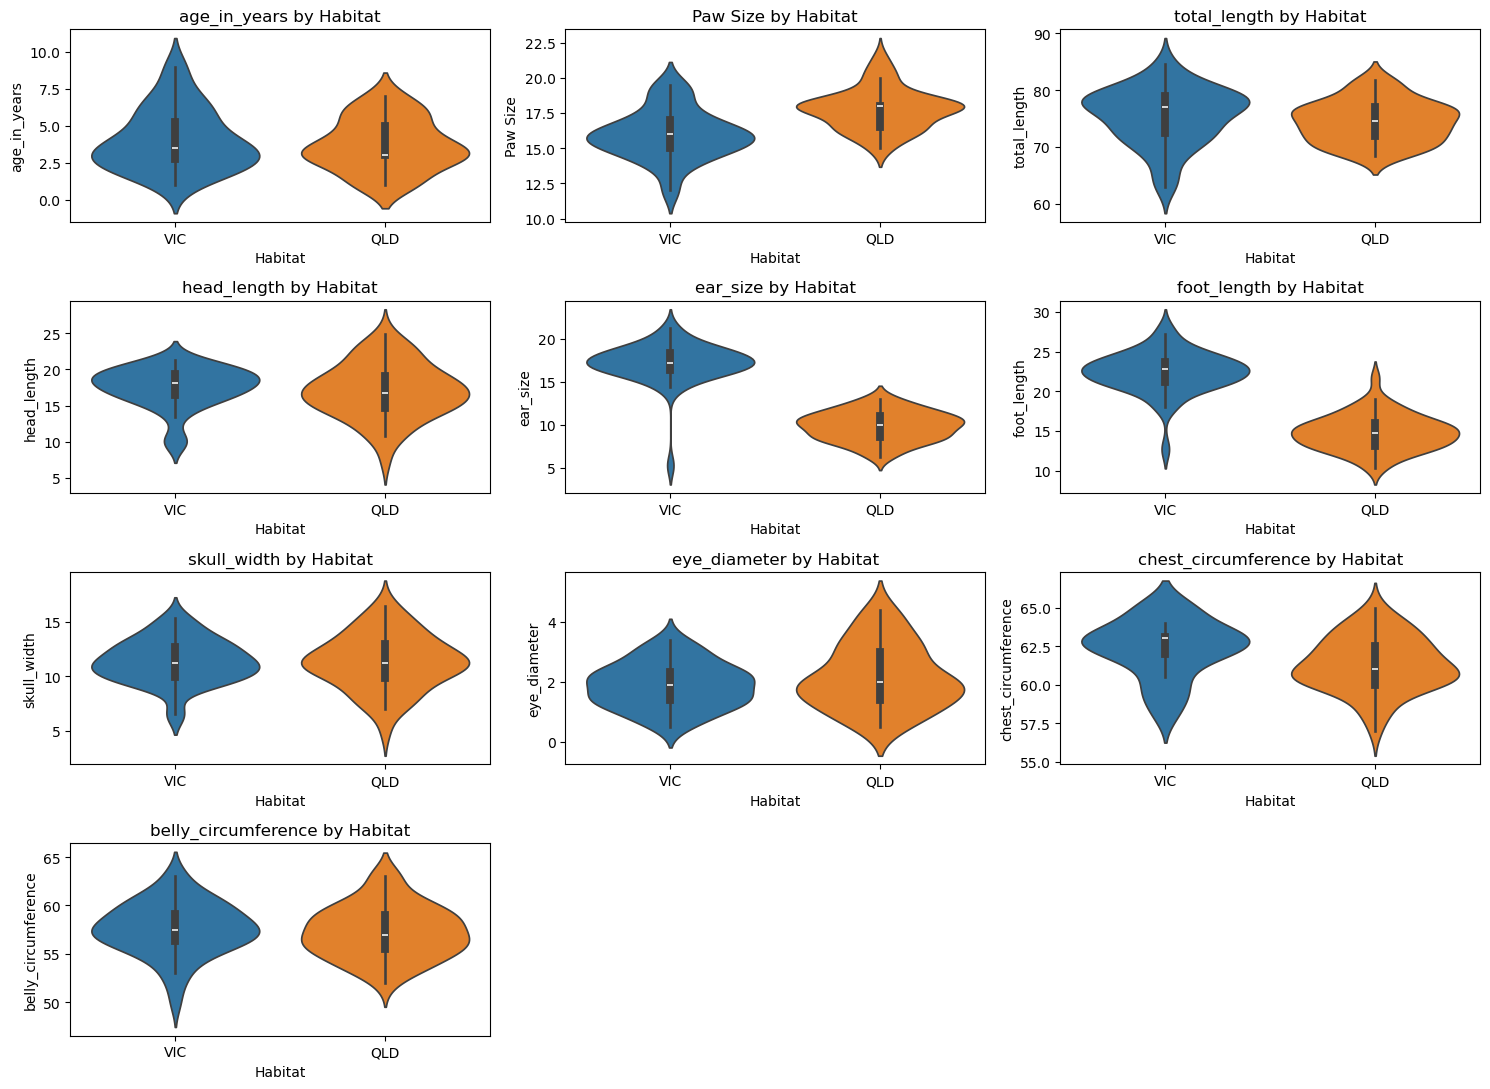

In [102]:
# Setting up the figure size for multiple plots
plt.figure(figsize=(15, 11))

# Ploting each physical feature as a violin plot, colored by habitat
for i, feature in enumerate(physical_features, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(data=koalas_cleaned, x='habitat', y=feature, hue='habitat', dodge=False)
    plt.title(f'{feature} by Habitat')
    plt.xlabel('Habitat')
    plt.ylabel(feature)
    plt.legend([],[], frameon=False)  # Hide legend for each plot to avoid clutter

# Adjusting the layout for better readability
plt.tight_layout()
plt.show()

**We can observe some patterns in koala physical characteristics based on habitat from the data and visualizations.** 


### 6. What factors are correlated with the total length of a Koala?

In [105]:
# Defining the list of physical features excluding the non-numeric columns
physical_features = ['Paw Size', 'total_length', 'head_length', 'ear_size', 
                     'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference']

# Subsetting the DataFrame to include only the physical features
koalas_numeric = koalas_cleaned[physical_features]

# Calculating the correlation of physical features with total length
correlation_with_total_length = koalas_numeric.corr()['total_length'].sort_values(ascending=False)

# Displaying the results
print("Correlation of Physical Characteristics with Total Length:")
correlation_with_total_length

Correlation of Physical Characteristics with Total Length:


total_length           1.000000
head_length            0.686376
skull_width            0.636046
Paw Size               0.557629
chest_circumference    0.537824
belly_circumference    0.495331
foot_length            0.409360
eye_diameter           0.213072
ear_size               0.180098
Name: total_length, dtype: float64

# Section 4: Recommendation

The study of koalas physical characteristics such as head length, skull width, and chest circumference gives significant information on their health and adaptability in various habitats. Notably, koalas in Victoria and Queensland have unique physical traits, most likely due to adaptations to local environments. This shows that conservation methods should be adjusted to the unique needs of koalas in various settings. Conservation activities that focus on maintaining and restoring natural ecosystems, guaranteeing enough food supplies, and avoiding habitat fragmentation can considerably improve koalas' chances of prospering. Furthermore, monitoring these physical characteristics provides a realistic method for assessing the health of koala populations over time. Such focused tactics allow conservationists to adapt to the particular environmental problems encountered by koalas, eventually helping their long-term survival and well-being.